<a href="https://colab.research.google.com/github/DrMelissaFranklin/Docker.dsub/blob/main/Capstone_CO2_Sequestration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***# Plots of Water and Gas (WAG) cycling during oil extraction to pinpoint dates for Seismic Activity.***


---


# IMPORTANT NOTE from Mel: There are generally not many aberrant events and given the cost of such an event it is not surprising that they are fairly well controlled year after year.
# CO2 gas spikes in pressure occurred in the transport of the anthropogenic CO2 (piped from the fertilizer and ethanol plants in Kansas down to the facilities in the TX panhandle).  *Although it is rare: only about two days eye-balling it, called "High Pressure Pipeline" days, between Jan 1, 2019 and December 2021!*


---


# SALIMA Model (Note from Mel):  Seasonal CO2 above ground (in the atmosphere)declines in winter due to lack of agricultural activity/growing, so it's possible if data were stratified (winter vs non-winter) and the Seasonal Alima model were run, we might see more Percent Change in Gas Rate events...?

---



## Problem Definition


see ppt Dec 6, 2024

## Data Collection/Sources


###Rename as "TXpanhandle" from SME: /content/Farnsworth Unit Data - 202102_FINAL.xlsx

## Data Cleaning


###NO cleaning - want nulls to indicate when no WAG cycling

## Exploratory Data Analysis


In [1]:
%pip install -U openpyxl

In [2]:
# Import Necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import openpyxl

In [25]:
# Load and Preprocess Data:

# Load data via path to Excel file
file_path = '/content/Farnsworth Unit Data - 202102_FINAL.xlsx'

# Option 1: Read all sheets
all_sheets = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')

# Access a specific sheet
sheet_SWP = 'SWP_Dashboard thru 2-28-2021'  # Name of desired sheet

#turn that sheet into a dataframe
df_SWP = all_sheets[sheet_SWP]

# Option 2: Read a specific sheet directly
#df = pd.read_excel(file_path, sheet_name=sheet_Date, engine='openpyxl')

# Display the first few rows of the DataFrame
print(df_SWP.head())

        Date  Oil Production (bbls)  Water Production (bbls)  \
0 2014-03-26                 1150.0                      0.0   
1 2014-03-27                    0.0                      0.0   
2 2014-04-01                    0.0                      0.0   
3 2014-04-02                 1321.0                   6833.0   
4 2014-04-03                 1338.0                   7223.0   

   Water Injection (bbls)  Arkalon CO2 (mcf)  Borger CO2 (mcf)  \
0                     0.0                0.0               0.0   
1                     0.0                0.0               0.0   
2                     0.0                0.0               0.0   
3                  6833.0             8594.0            2608.0   
4                  6848.0             8453.0            2381.0   

   Recycle CO2 (mcf)  Flare (mcf)  External Sources (bbls)  \
0                0.0          0.0                      0.0   
1                0.0          0.0                      0.0   
2                0.0          0.

In [26]:
# Set date column as index
df_SWP.set_index(df_SWP['Date'],inplace= True)

In [27]:
df_SWP['Date'] = pd.to_datetime(df_SWP['Date'])

In [28]:
#slice out the 2019 dates
df_2019 = df_SWP[df_SWP['Date'].dt.year == 2019]

In [29]:
df_2019.head()

,Date,Oil Production (bbls),Water Production (bbls),Water Injection (bbls),Arkalon CO2 (mcf),Borger CO2 (mcf),Recycle CO2 (mcf),Flare (mcf),External Sources (bbls),Total Injection (bbls)
Date,,,,,,,,,,
2019-01-01,2019-01-01,1114.397095,5958.703125,5950.0,10946.000000,NaN,11081.000000,0.0,NaN,NaN
2019-01-02,2019-01-02,1427.965820,6706.014648,6699.0,9288.000000,NaN,3164.000000,3866.0,NaN,NaN
2019-01-03,2019-01-03,1467.208496,7820.741699,7808.0,0.000000,NaN,9230.000000,2901.0,NaN,NaN
2019-01-04,2019-01-04,1289.665771,7866.133301,7860.0,10747.000000,NaN,12074.000000,0.0,NaN,NaN
2019-01-05,2019-01-05,1282.938354,8259.702148,8251.0,10347.000977,NaN,11520.000977,0.0,NaN,NaN


In [30]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     365 non-null    datetime64[ns]
 1   Oil Production (bbls)    365 non-null    float64       
 2   Water Production (bbls)  365 non-null    float64       
 3   Water Injection (bbls)   365 non-null    float64       
 4   Arkalon CO2 (mcf)        365 non-null    float64       
 5   Borger CO2 (mcf)         0 non-null      float64       
 6   Recycle CO2 (mcf)        365 non-null    float64       
 7   Flare (mcf)              365 non-null    float64       
 8   External Sources (bbls)  0 non-null      float64       
 9   Total Injection (bbls)   0 non-null      float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 31.4 KB


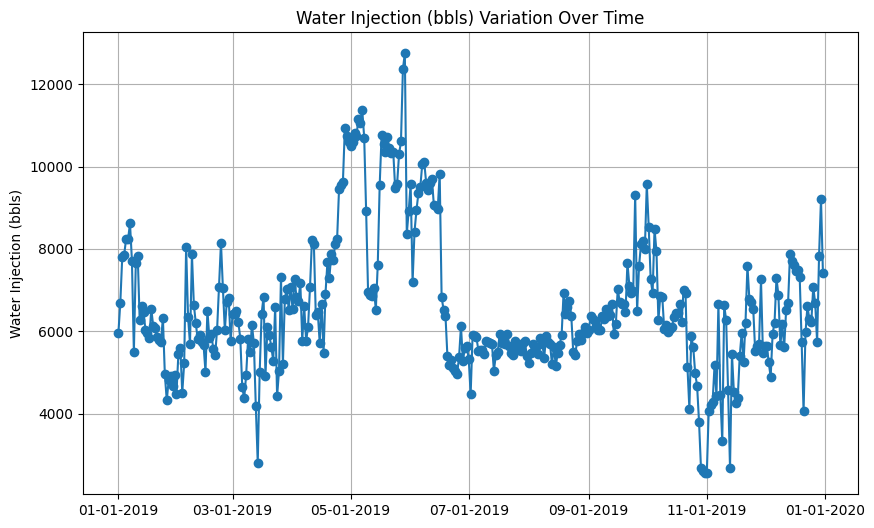

In [31]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the Water Injection (bbls) column against Date
plt.plot(df_2019.index, df_2019['Water Injection (bbls)'], marker='o', linestyle='-')

# Add labels and title:

# Format the x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y')) # format: Month-Day-Year
plt.ylabel('Water Injection (bbls)')
plt.title('Water Injection (bbls) Variation Over Time')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [38]:
# Access the specific sheet called "Well Tests"
sheet_wells = 'Well Tests'

#turn sheet into a dataframe
df_wells = all_sheets[sheet_wells]

In [39]:
# Display  first few rows of  DataFrame for Well Tests
print(df_wells.head())

   Unit Name           Type Effective Date  Gas Volume Override  \
0  FWU #1802  direct volume     2017-03-14                  0.0   
1   FWU #904  direct volume     2017-07-05                  0.5   
2  FWU #2008  direct volume     2017-11-03                  0.0   
3  FWU #1501  direct volume     2017-11-26                  0.0   
4   FWU #701  direct volume     2018-04-21                343.0   

   Recovered Lift Gas  Oil/Emulsion Volume Override  Water Volume Override  \
0                 NaN                          22.0                   31.0   
1                 NaN                          12.0                   20.0   
2                 NaN                           5.0                  262.0   
3                 NaN                           5.0                  512.0   
4                 NaN                          61.0                  321.0   

   Gas Oil Ratio  Change in Oil/Emulsion Rate  % Change in Oil/Emulsion Rate  \
0       0.000000                          NaN   

In [49]:
# Access sheet names from excel sheet
sheet_names = all_sheets.keys()

# Print sheet names to confirm
print(sheet_names)

dict_keys(['SWP_Dashboard thru 2-28-2021', 'Daily Prod_Inj & Pressures', 'Monthly Prod_Inj', 'Well Tests', 'Downtimes', 'Water Meters', 'Gas Meters'])


In [51]:
# Set "Effective Date" column as index in dataframe created from sheet "Well Tests"
df_wells.set_index(df_wells['Effective Date'],inplace= True)

In [52]:
df_wells['Effective Date'] = pd.to_datetime(df_wells['Effective Date'])

In [ ]:
df = df_2019[['% Change in Gas Rate']]

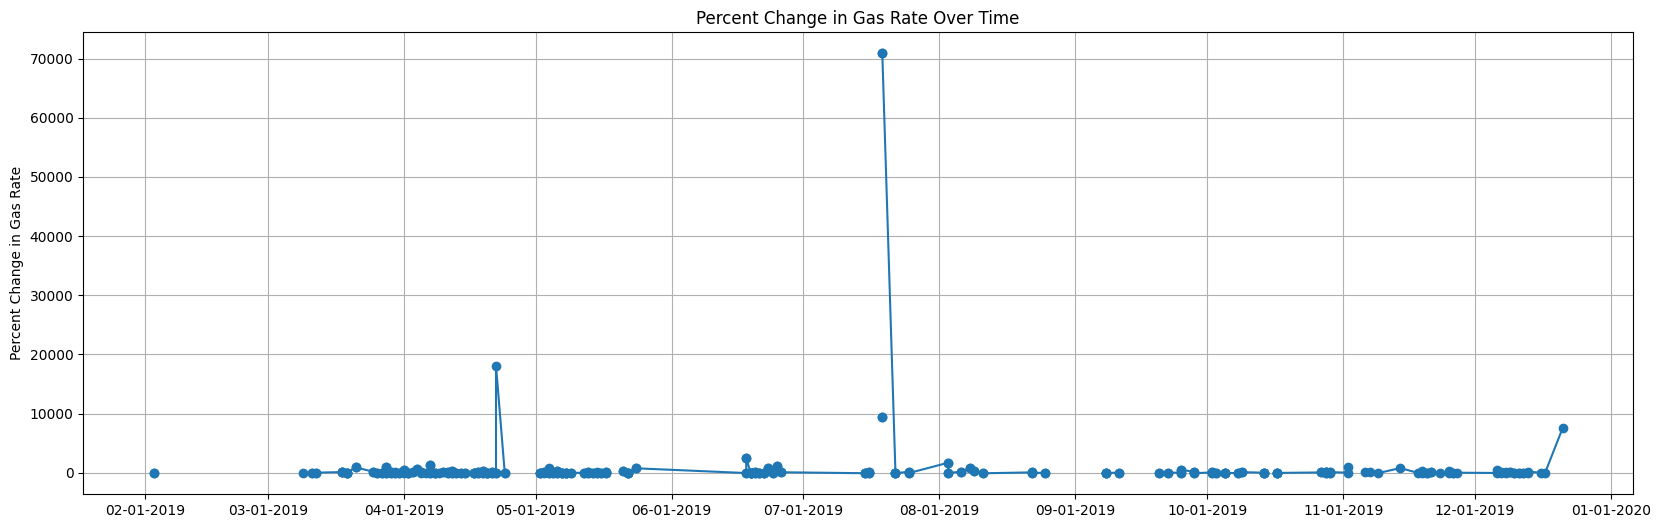

In [61]:
plt.figure(figsize=(20, 6))  # Set the figure size

# % Change in Gas Rate column against Effective Date
plt.plot(df_2019_wells.index, df_2019_wells['% Change in Gas Rate'], marker='o', linestyle='-')

# Add labels and title

# Format the x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y')) # format: Month-Day-Year
plt.ylabel('Percent Change in Gas Rate')
plt.title('Percent Change in Gas Rate Over Time')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [54]:
# Display the DataFrame to verify the changes
print(df_2019_wells.head())

                Unit Name                  Type Effective Date  \
Effective Date                                                   
2019-01-02       FWU #808  3 phase with orifice     2019-01-02   
2019-01-02       FWU #808  3 phase with orifice     2019-01-02   
2019-01-29      FWU #1314         direct volume     2019-01-29   
2019-02-03      FWU #1312         direct volume     2019-02-03   
2019-02-03      FWU #1312         direct volume     2019-02-03   

                Gas Volume Override  Recovered Lift Gas  \
Effective Date                                            
2019-01-02                      NaN                 NaN   
2019-01-02                      NaN                 NaN   
2019-01-29                    287.0                 NaN   
2019-02-03                    139.0                 NaN   
2019-02-03                    139.0                 NaN   

                Oil/Emulsion Volume Override  Water Volume Override  \
Effective Date                                      

In [53]:
#slice out the 2019 dates
df_2019_wells = df_wells[df_wells['Effective Date'].dt.year == 2019]

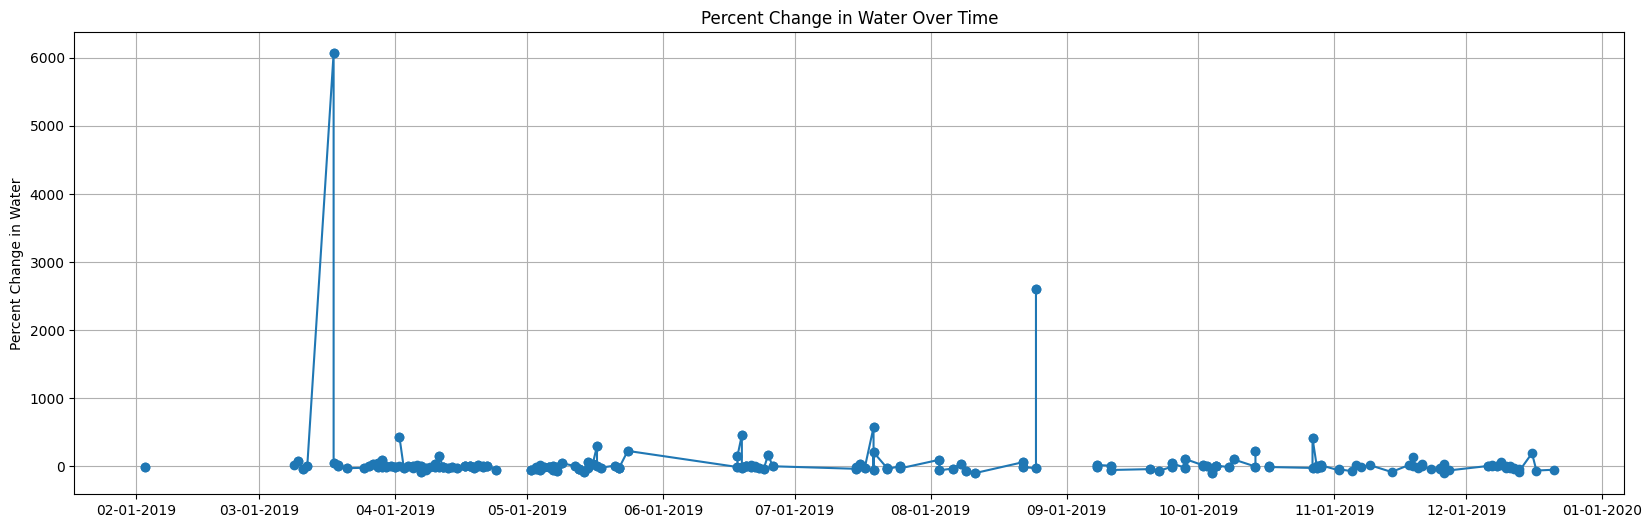

In [59]:
plt.figure(figsize=(20, 6))  # Set the figure size

# %Change in Water Rate column against Effective Date
plt.plot(df_2019_wells.index, df_2019_wells['% Change in Water Rate'], marker='o', linestyle='-')

# Add labels and title

# Format the x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y')) # format: Month-Day-Year
plt.ylabel('Percent Change in Water')
plt.title('Percent Change in Water Over Time')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot more desired columns in Wells Tests sheet against the effective date:
plt.plot(df.index, df[' '], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('*Date*')
plt.ylabel('')
plt.title('*Y* Variation Over Time')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

Forecasting...

In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Water Injection (bbls)'], ax=axes[0])
plot_pacf(df['Water Injection (bbls)'], ax=axes[1])
plt.show()

# Grid search (example)
import itertools

p_values = range(0, 3)  # Example range for p
d_values = range(0, 2)  # Example range for d
q_values = range(0, 3)  # Example range for q

best_aic = float('inf')
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df['Water Injection (bbls)'], order=(p, d, q))
        fit_model = model.fit()
        if fit_model.aic < best_aic:
            best_aic = fit_model.aic
            best_order = (p, d, q)
    except:
        continue

print(f"Best ARIMA order: {best_order}")

## Train Seasonal ARIMA Model for Forecasting since seasonality for CO2 is expected given agricultural activity, and water injection will correlate:

In [ ]:
# Train Seasonal ARIMA Model for Forecasting since seasonality for CO2 is expected given agricultural activity, and water injection will correlate:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#???    s = winter vs non-winter months

# Define SARIMA parameters
order = (p, d, q)  # Replace with chosen ARIMA order???
seasonal_order = (P, D, Q, s)  # Replace with chosen seasonal order for non-winter months vs winter months (s is the seasonality period)

# Create and fit the SARIMA model
model = SARIMAX(df['Change in Water Rate'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit()

# Make predictions
forecast = fit_model.get_forecast(steps=10)  # Forecast the next 10 steps

#NOTE: "Make sure your time series is stationary (constant mean and variance) before applying ARIMA. Differencing (d parameter) helps achieve stationarity"

## IGNORE BELOW PLEASE! More Data Visualization/Communication of Results


In [ ]:
model_array = np.array(fit_model.fittedvalues)

In [ ]:
df1.head(20)

In [ ]:
forecastdf = pd.DataFrame(forecast)

In [ ]:
forecastdf.info()

In [ ]:
forecastdf.rename(columns={'predicted_mean': 'Water Injection (bbls)'})

In [ ]:
forecastdf.index = pd.date_range("2019-01-01", periods=48, freq="D")

In [ ]:
forecastdf


In [ ]:
print(df_2019.columns)


In [ ]:
Water_Rate_df = df_2019.set_index(df_2019['% Change in Water Rate'], inplace=True)

In [ ]:
Water_Rate.info()

In [ ]:
actualtempdf.index = pd.date_range("2024-03-01", periods=32, freq="15min")

In [ ]:
# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(actualdf,label='Change in Gas Rate', color = 'blue')
plt.plot(forecastdf, label='% Change in Gas Rate', color='red')
plt.title('Percent Change in Gas Rate vs Change in Gas Rate')
plt.xlabel('Change in Gas Rate')
plt.ylabel('Percent Change in Gas Rate')
plt.legend()
plt.show()